In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dj = yf.Ticker("^DJI")

In [5]:
df = dj.history(start="2022-01-01", end="2025-12-31", interval="1d")
# df.to_csv("dow_jones_2022_2025.csv")

In [6]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,36321.589844,36595.820312,36246.449219,36585.058594,347930000,0.0,0.0
2022-01-04 00:00:00-05:00,36636.000000,36934.839844,36636.000000,36799.648438,435080000,0.0,0.0
2022-01-05 00:00:00-05:00,36722.601562,36952.648438,36400.390625,36407.109375,462040000,0.0,0.0
2022-01-06 00:00:00-05:00,36409.050781,36464.191406,36200.679688,36236.468750,385890000,0.0,0.0
2022-01-07 00:00:00-05:00,36249.589844,36382.839844,36111.531250,36231.660156,356110000,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-25 00:00:00-04:00,46097.429688,46122.421875,45785.171875,45947.320312,509180000,0.0,0.0
2025-09-26 00:00:00-04:00,46101.449219,46353.031250,46051.921875,46247.289062,434270000,0.0,0.0
2025-09-29 00:00:00-04:00,46306.339844,46387.058594,46149.050781,46316.070312,479740000,0.0,0.0


In [24]:
dow30 = [
    "AAPL",  # Apple
    "AMGN",  # Amgen
    "AXP",   # American Express
    "BA",    # Boeing
    "CAT",   # Caterpillar
    "CRM",   # Salesforce
    "CSCO",  # Cisco Systems
    "CVX",   # Chevron
    "DIS",   # Walt Disney
    "DOW",   # Dow Inc. (the materials company, not the index)
    "GS",    # Goldman Sachs
    "HD",    # Home Depot
    "HON",   # Honeywell
    "IBM",   # IBM
    "INTC",  # Intel
    "JNJ",   # Johnson & Johnson
    "JPM",   # JPMorgan Chase
    "KO",    # Coca-Cola
    "MCD",   # McDonald's
    "MMM",   # 3M
    "MRK",   # Merck
    "MSFT",  # Microsoft
    "NKE",   # Nike
    "PG",    # Procter & Gamble
    "TRV",   # Travelers
    "UNH",   # UnitedHealth Group
    "V",     # Visa
    "VZ",    # Verizon
    "WBA",   # Walgreens Boots Alliance
    "WMT"    # Walmart
]


In [64]:
df_dict = {}
for ticker in dow30:
    stock = yf.Ticker(ticker)
    history = stock.history(start = "2019-09-01", 
                            end = "2025-10-01",
                            interval = "1d")
    df_dict[ticker] = history

Text(0.5, 1.0, 'Dow Jones 30 Stocks Close Prices, 1st Sep 2019 - 1st Oct 2025')

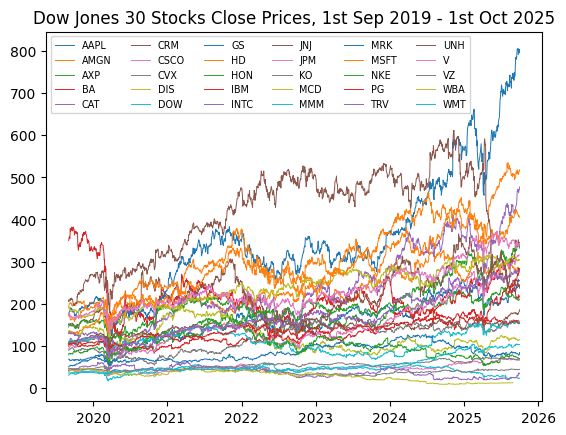

In [66]:
for stock in df_dict:
    plt.plot(df_dict[stock]["Close"], label = stock, linewidth = 0.7)

plt.legend(ncol =6, fontsize = "x-small")
plt.title("Dow Jones 30 Stocks Close Prices, 1st Sep 2019 - 1st Oct 2025")

In [74]:
# convert to annual returns
sep3s = df_dict["AAPL"][(df_dict["AAPL"].index.month == 9) & (df_dict["AAPL"].index.day == 3)]


In [75]:
sep3s

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-03 00:00:00-04:00,49.706343,49.838778,49.174199,49.530567,80092000,0.0,0.0
2020-09-03 00:00:00-04:00,123.447609,125.324947,117.212485,117.582115,257599600,0.0,0.0
2021-09-03 00:00:00-04:00,150.527086,151.378804,149.871175,151.055740,57808700,0.0,0.0
2024-09-03 00:00:00-04:00,227.491260,227.939173,220.145443,221.738037,50190600,0.0,0.0
2025-09-03 00:00:00-04:00,237.210007,238.850006,234.360001,238.470001,66427800,0.0,0.0


In [78]:
sep3s["Shift Close"] = sep3s["Close"].shift(1)

C:\Users\boris\AppData\Local\Temp\ipykernel_18408\3042401362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sep3s["Shift Close"] = sep3s["Close"].shift(1)


In [81]:
sep3s["Returns"] = sep3s.apply(lambda row: (row["Close"] - row["Shift Close"]) / row["Shift Close"], axis = 1)

C:\Users\boris\AppData\Local\Temp\ipykernel_18408\3646254484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sep3s["Returns"] = sep3s.apply(lambda row: (row["Close"] - row["Shift Close"]) / row["Shift Close"], axis = 1)
